In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as smf

In [4]:
measure_x = [1.13, 1.55, 1.43, 0.92, 1.25, 1.36, 1.32, 0.85, 1.07, 1.48, 1.20, 1.33, 1.18, 1.22, 1.29]

([<matplotlib.patches.Wedge at 0x207e78ea4d0>,
 [Text(1.0799826583355752, 0.2088958058325361, ''),
  Text(0.879530227365716, 0.6606258995452814, ''),
  Text(0.4512582841123353, 1.0031779308876323, ''),
  Text(0.02789582938486876, 1.099646226157727, ''),
  Text(-0.3684439578218415, 1.0364598641262368, ''),
  Text(-0.7758423804079155, 0.7797875356550523, ''),
  Text(-1.0389282376238442, 0.36142511958608176, ''),
  Text(-1.0994323896933629, -0.03533299439817751, ''),
  Text(-1.0307331502707187, -0.38417336312269273, ''),
  Text(-0.775841851092645, -0.7797880622920167, ''),
  Text(-0.38852754555742175, -1.1353617689279156, ''),
  Text(0.10770380480173959, -1.0947145246278724, ''),
  Text(0.5489264028457106, -0.9532469796746638, ''),
  Text(0.8806464533005887, -0.6591371816921683, ''),
  Text(1.073936955823207, -0.23803238207685806, '')],
 [Text(0.5890814500012227, 0.11394316681774695, '6.08%'),
  Text(0.47974376038129957, 0.3603413997519716, '8.34%'),
  Text(0.24614088224309197, 0.54718796

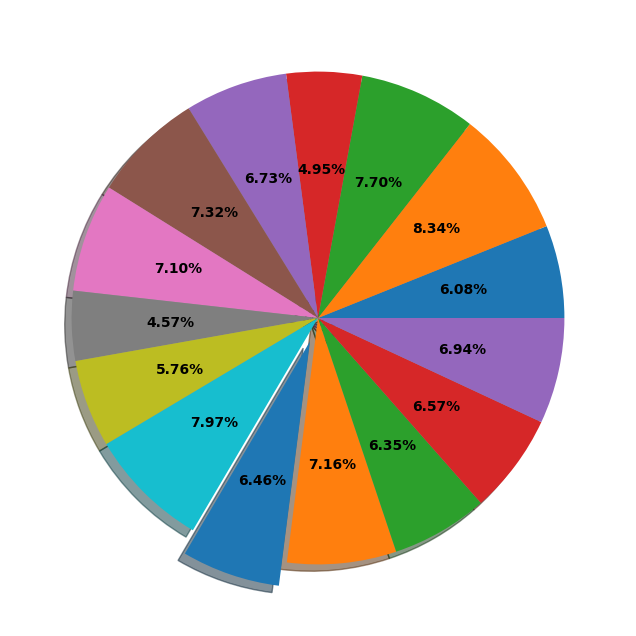

In [5]:
plt.figure(figsize = (8,8))
plt.pie(measure_x, autopct= '%.2f%%',shadow = True,
        explode = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0],
        textprops = {'size':'medium',
                   'fontweight':'bold',
                   'color':'black'})

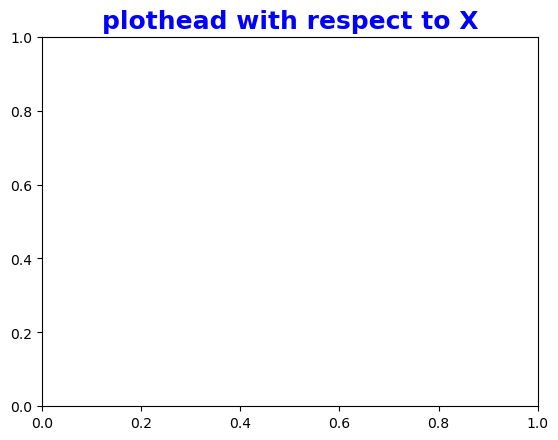

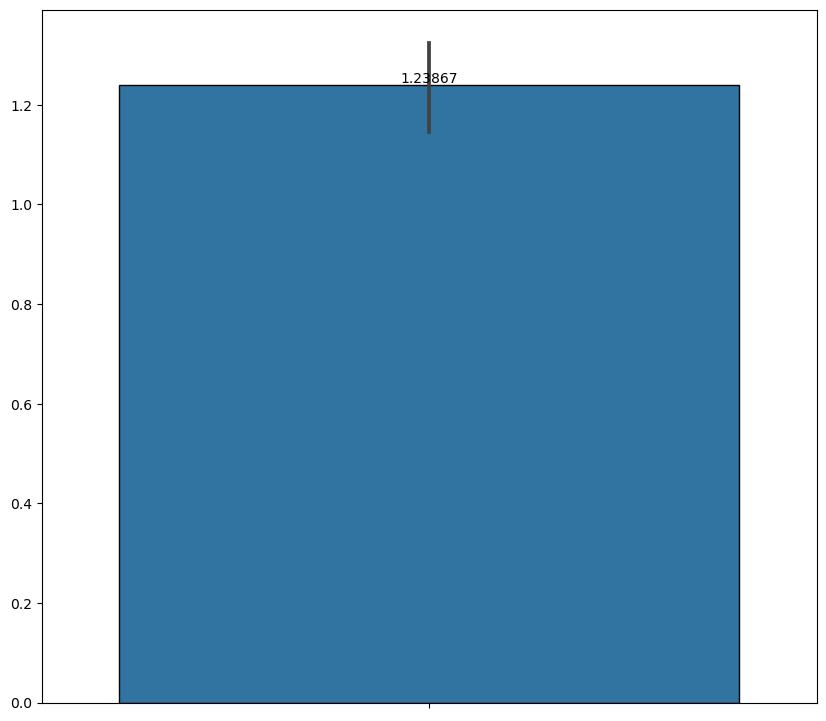

In [7]:
plt.title('plothead with respect to X', fontsize = 18, fontweight = 'bold', color='b')
plt.savefig('plothead.png')
plt.show()
plt.figure(figsize = (10,9))
ax = sns.barplot(y = measure_x, edgecolor='black')
plt.xticks(rotation = 90, fontsize = 12, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

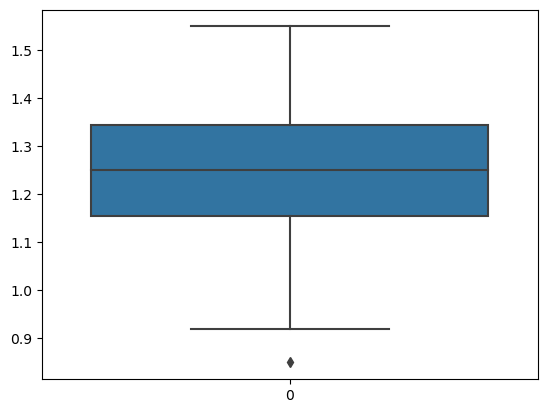

In [8]:
sns.boxplot(measure_x)
plt.savefig('plothead.png')
plt.show()

In [9]:
measure_x=pd.Series(measure_x)
Q1 = np.quantile(measure_x,0.25)
Q3 = np.quantile(measure_x,0.75)
med = np.median(measure_x)
IQR = Q3 - Q1
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)
print('First Quantile=', Q1, 'Second Quantile=', med, 'Third Quantile=', Q3,
      'Inter-Quartile Range=', IQR, 'Upper Whisker=', upper_bound, 'Lower Whisker=', lower_bound)
Outliers = measure_x[(measure_x <= lower_bound) | (measure_x >= upper_bound)]
print('The outlier in the boxplot:',Outliers)
Outliers = measure_x[(measure_x >= upper_bound)]
print('The outlier in the boxplot:',Outliers)
print(measure_x.describe())
print("Variance=",measure_x.var())

First Quantile= 1.1549999999999998 Second Quantile= 1.25 Third Quantile= 1.3450000000000002 Inter-Quartile Range= 0.1900000000000004 Upper Whisker= 1.6300000000000008 Lower Whisker= 0.8699999999999992
The outlier in the boxplot: 7    0.85
dtype: float64
The outlier in the boxplot: Series([], dtype: float64)
count    15.000000
mean      1.238667
std       0.193164
min       0.850000
25%       1.155000
50%       1.250000
75%       1.345000
max       1.550000
dtype: float64
Variance= 0.037312380952380965


In [15]:
print('Z score for 99% Conifidence Intervla =',np.round(stats.norm.ppf(.2),4))

Z score for 99% Conifidence Intervla = -0.8416


In [14]:
print('T score for 95% Confidence Interval =',np.round(stats.t.ppf(0.005,df=24),4))

T score for 95% Confidence Interval = -2.7969


In [16]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import statsmodels.api as smf
import statsmodels.formula.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [17]:
df=pd.read_csv(r'C:\Users\aaksh\OneDrive\Desktop\crd.csv')

In [18]:
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [19]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [22]:
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [23]:
df[df.values==0.0]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.0
0,120.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.0
0,120.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.0
0,120.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.0
0,120.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,140.0,0.000679,0.000000,0.006110,0.0,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.0
2125,142.0,0.001616,-0.000188,0.008078,0.0,0.0,0.0,74.0,0.4,35.857183,5.0,42.0,0.000000,1.0
2125,142.0,0.001616,-0.000188,0.008078,0.0,0.0,0.0,74.0,0.4,35.857183,5.0,42.0,0.000000,1.0
2125,142.0,0.001616,-0.000188,0.008078,0.0,0.0,0.0,74.0,0.4,35.857183,5.0,42.0,0.000000,1.0


<Axes: >

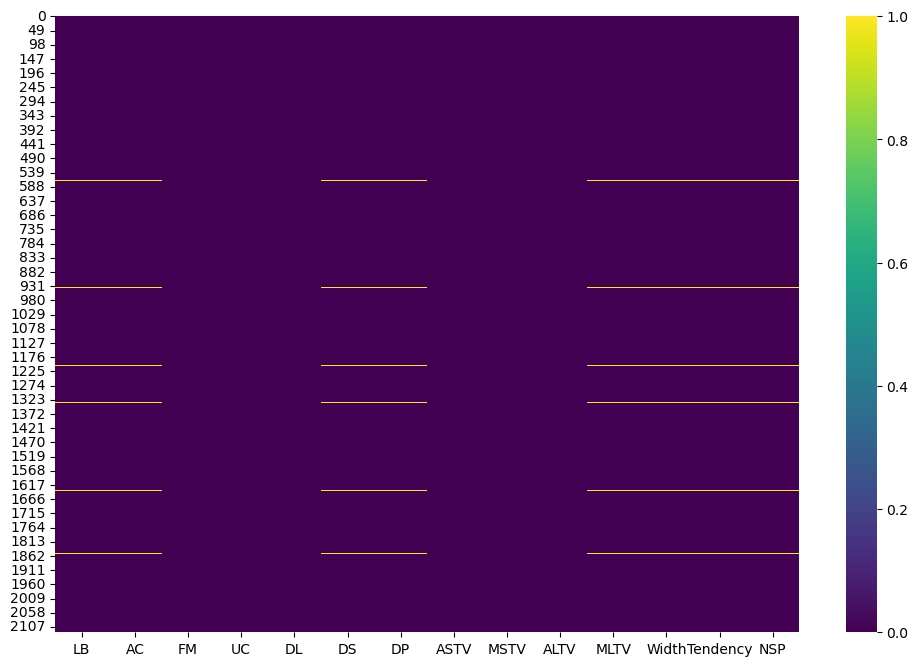

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),cmap='viridis')

In [25]:
df[df.duplicated()].shape

(2, 14)

In [26]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2121    False
2122    False
2123    False
2124    False
2125    False
Length: 2126, dtype: bool

In [27]:
df[df.duplicated()]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1115,122.0,0.000000,0.0,0.000000,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,0.0,1.0
1458,148.0,0.004717,0.0,0.002358,0.0,0.0,0.0,40.0,0.9,0.0,10.6,35.0,0.0,1.0


In [28]:
continuous_feature=[feature for feature in df.columns if df[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 14


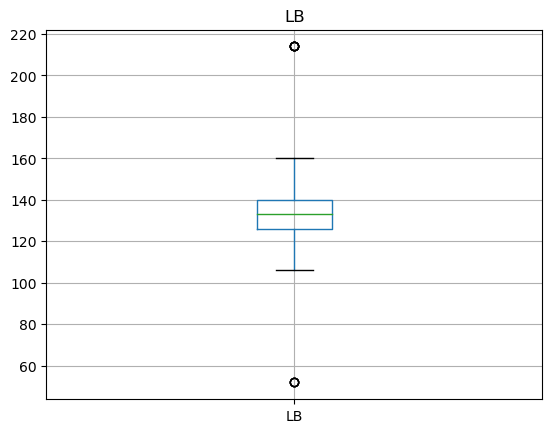

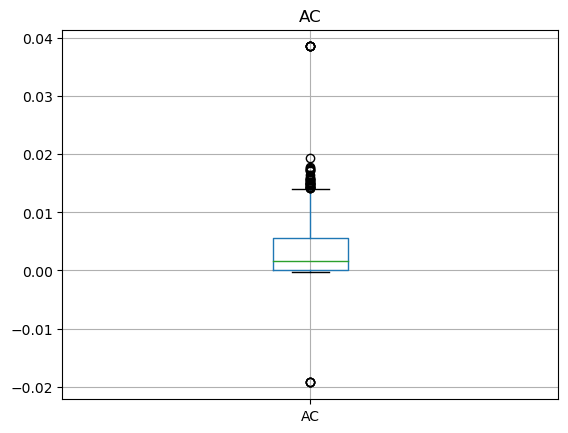

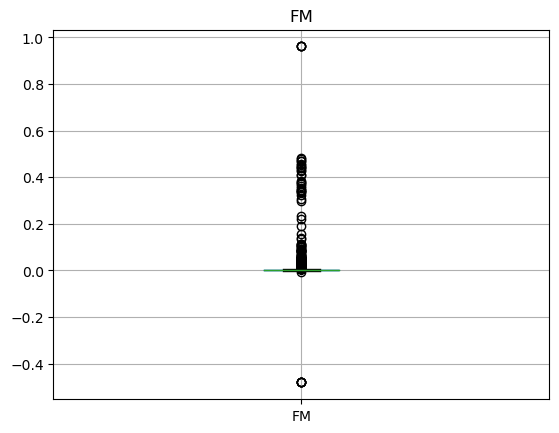

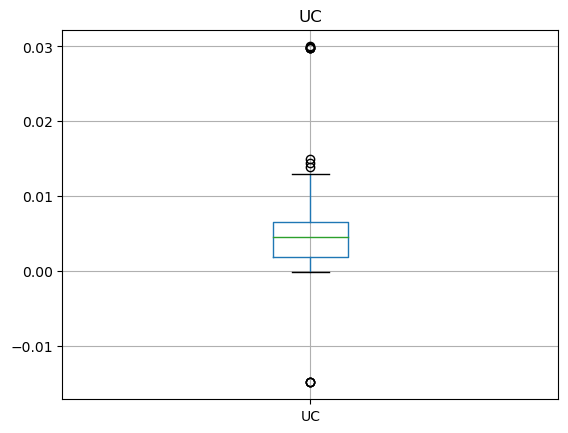

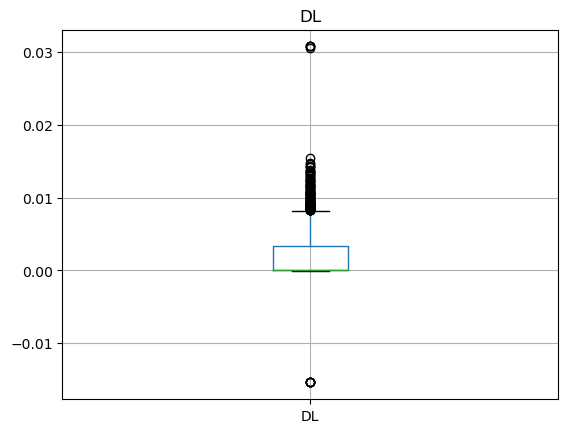

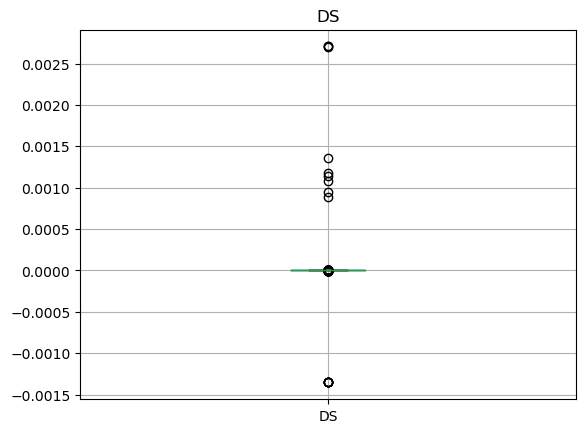

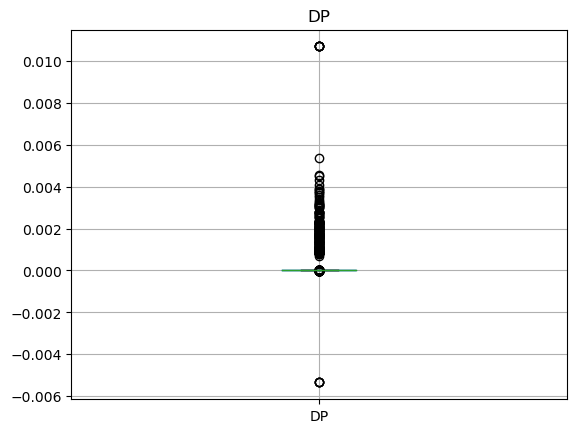

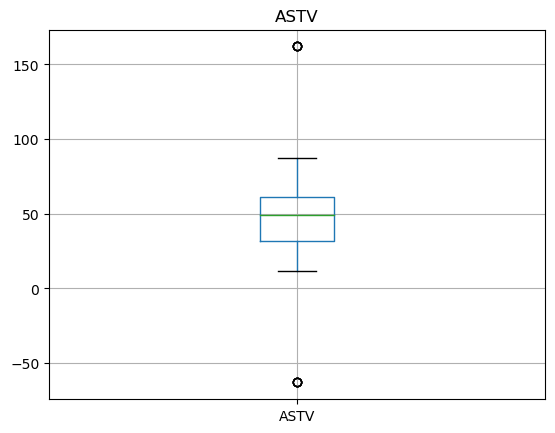

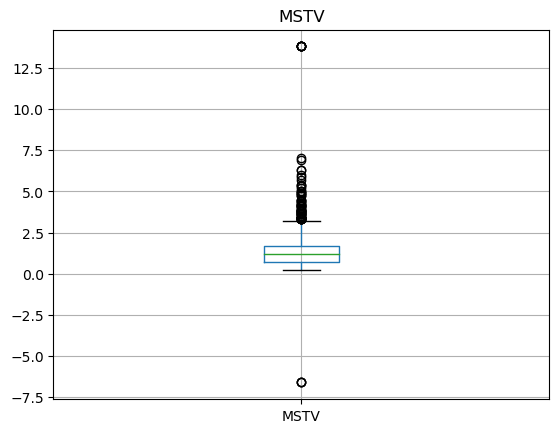

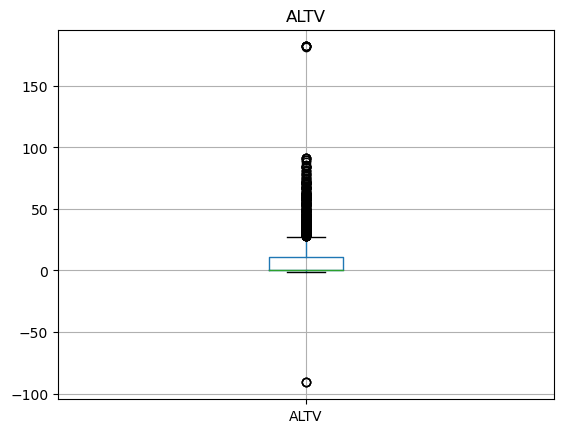

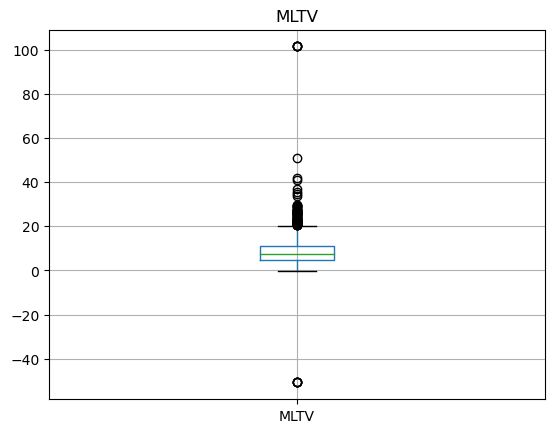

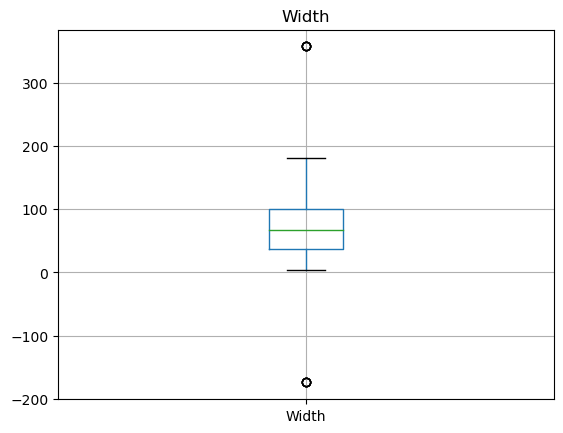

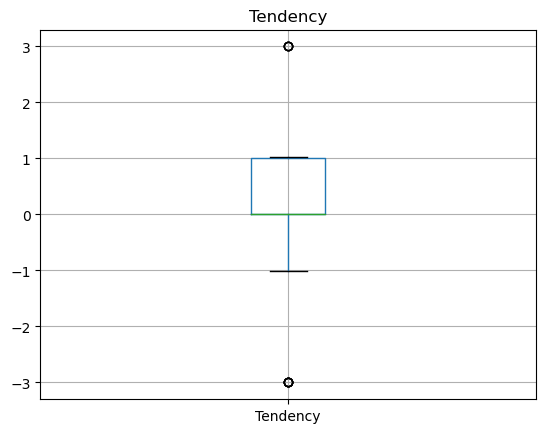

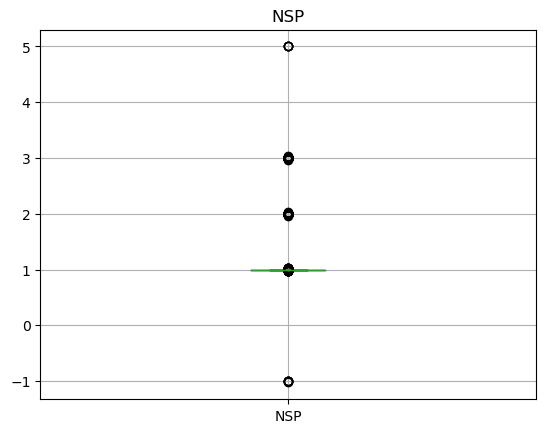

In [29]:
for feature in continuous_feature:
    data=df.copy()  
    data.boxplot(column=feature)
    plt.title(feature)
    plt.show()

In [42]:
Q1 = np.quantile(df.Width,0.25)
Q3 = np.quantile(df.Width,0.75)
med = np.median(df.Width)
IQR = Q3 - Q1
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)
print('First Quantile=', Q1,'\n' 'Second Quantile=', med,'\n' 'Third Quantile=', Q3,'\n'
      'Inter-Quartile Range=', IQR,'\n' 'Upper Whisker=', upper_bound,'\n' 'Lower Whisker=', lower_bound)

First Quantile= nan 
Second Quantile= nan 
Third Quantile= nan 
Inter-Quartile Range= nan 
Upper Whisker= nan 
Lower Whisker= nan


In [41]:
Outliers = df.Width[(df.Width <= lower_bound) | (df.Width >= upper_bound)]
print('The outlier in the boxplot:',Outliers)

The outlier in the boxplot: Series([], Name: Width, dtype: float64)


In [37]:
display(df[df.index.isin([49])],df.head())


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
49,158.0,0.005004,0.0,0.007506,0.000834,0.0,0.0,27.0,1.7,0.0,14.9,120.0,1.0,0.996714


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


C:\Users\aaksh\AppData\Local\Temp\ipykernel_6436\1236644347.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)
C:\Users\aaksh\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\aaksh\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


{'whiskers': [<matplotlib.lines.Line2D at 0x207e9870c90>,
 'caps': [<matplotlib.lines.Line2D at 0x207e988e850>,
 'boxes': [<matplotlib.lines.Line2D at 0x207e9871190>],
 'medians': [<matplotlib.lines.Line2D at 0x207e98c3890>],
 'fliers': [<matplotlib.lines.Line2D at 0x207e98c1690>],
 'means': []}

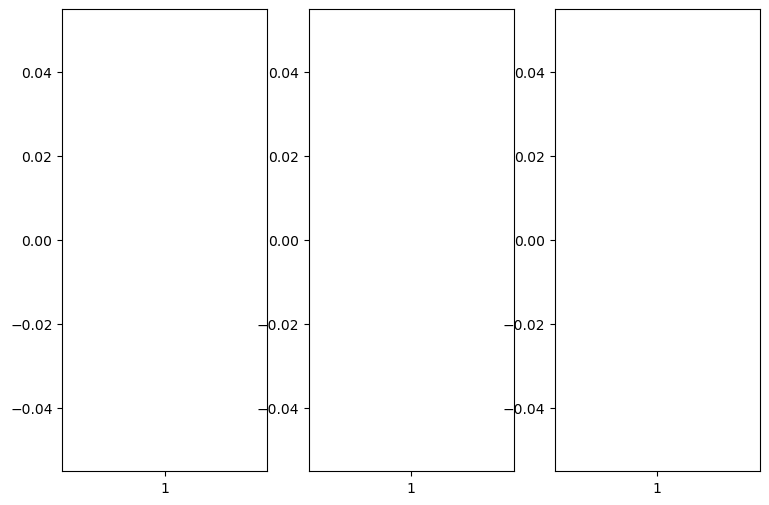

In [40]:
plt.subplots(figsize = (9,6))
plt.subplot(131)
plt.boxplot(np.log(df['Width']))
plt.subplot(132)
plt.boxplot(np.sqrt(df['Width']))
plt.subplot(133)
plt.boxplot(np.cbrt(df['Width']))

In [43]:
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(data[feature],dist='norm',plot=pylab)

Text(0.5, 1.0, 'MLTV')

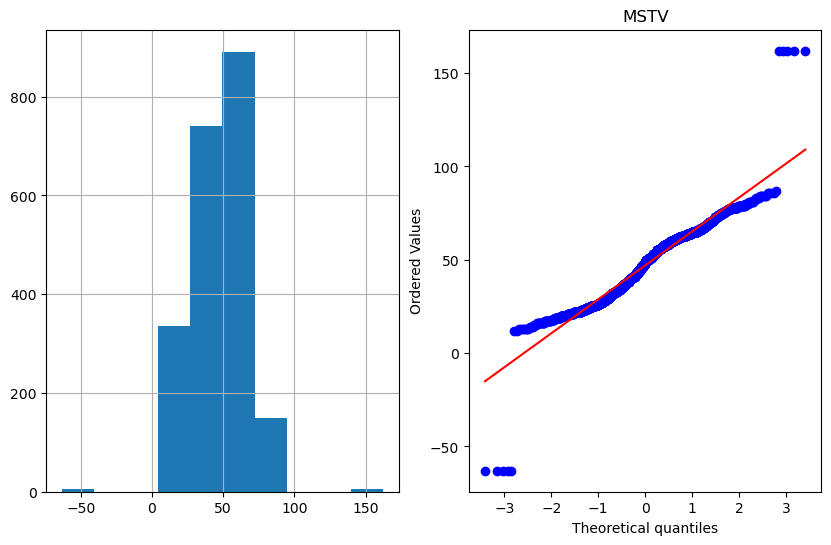

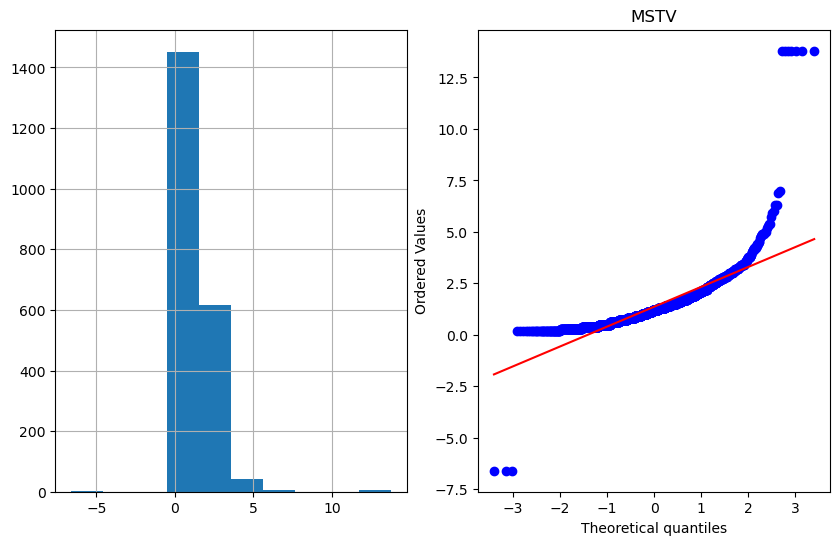

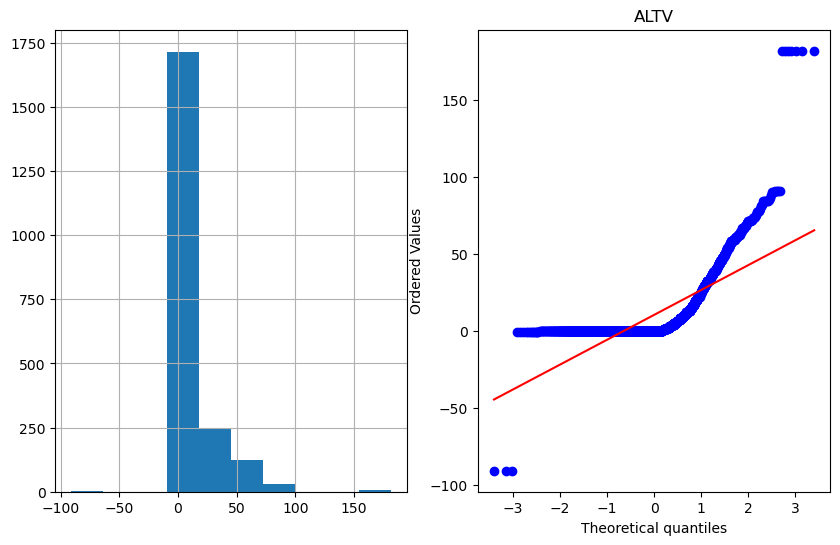

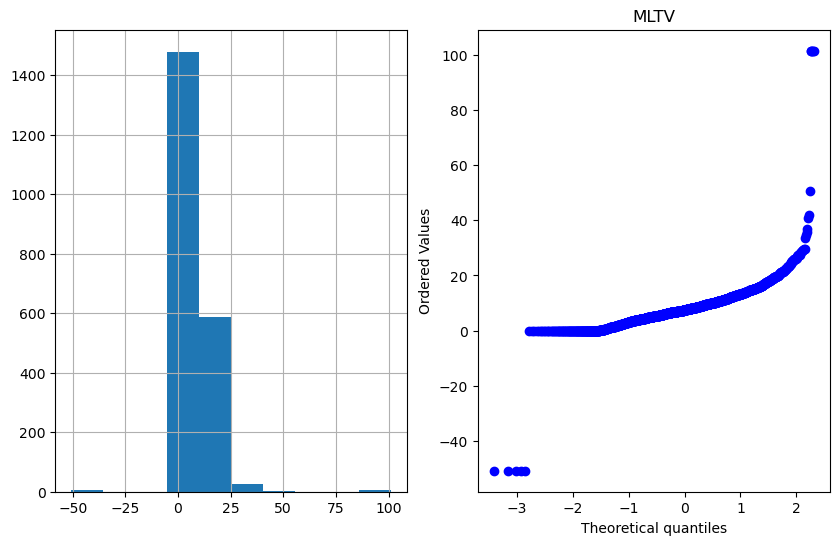

In [45]:
plot_data(df,'ASTV')
plt.title('MSTV')
plot_data(df,'MSTV')
plt.title('MSTV')
plot_data(df,'ALTV')
plt.title('ALTV')
plot_data(df,'MLTV')
plt.title('MLTV')

<Axes: ylabel='count'>

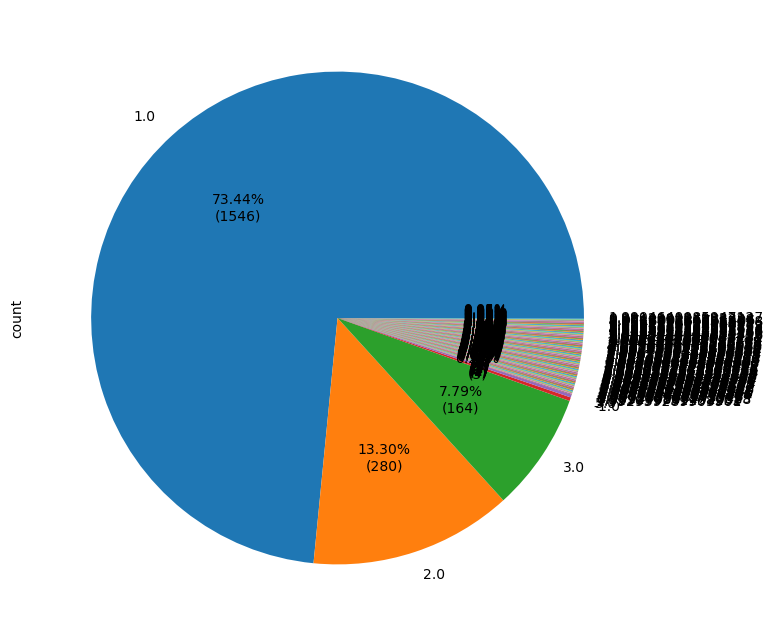

In [48]:
plt.figure(figsize=(8,8))
df['NSP'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df['NSP'].value_counts().sum())))

In [50]:
df.NSP.value_counts()

NSP
 1.000000    1546
 2.000000     280
 3.000000     164
-1.000000       5
 5.000000       4
             ... 
 0.992847       1
 2.971309       1
 0.984834       1
 0.991200       1
 1.990464       1
Name: count, Length: 111, dtype: int64

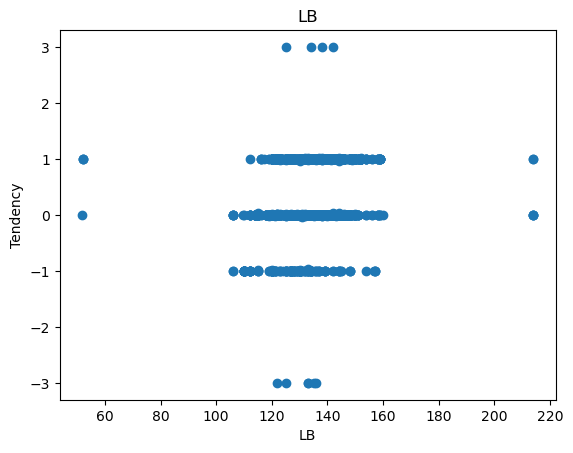

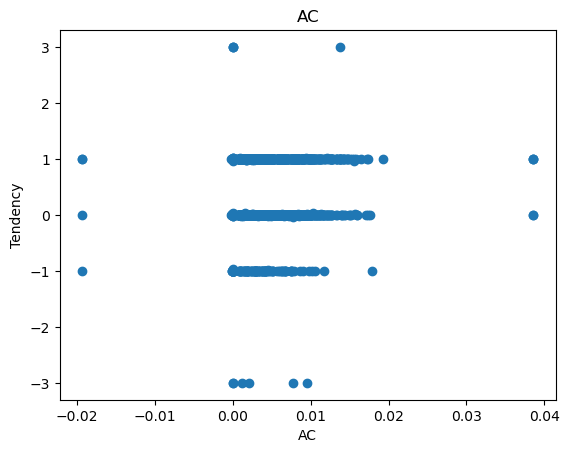

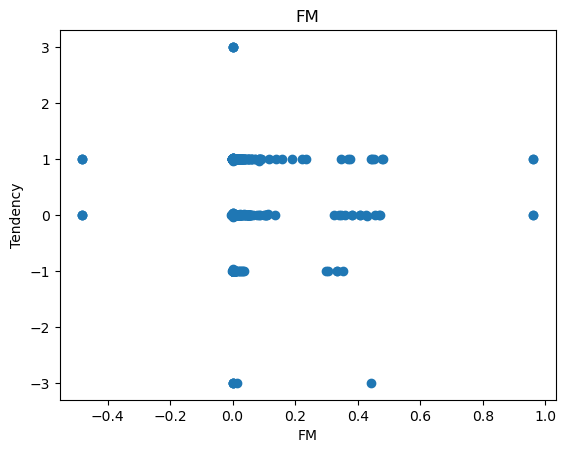

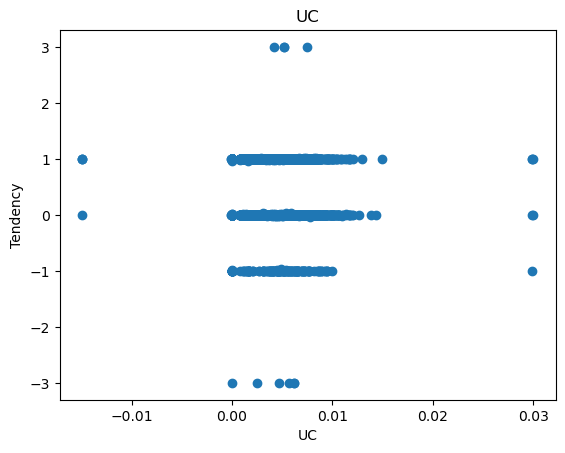

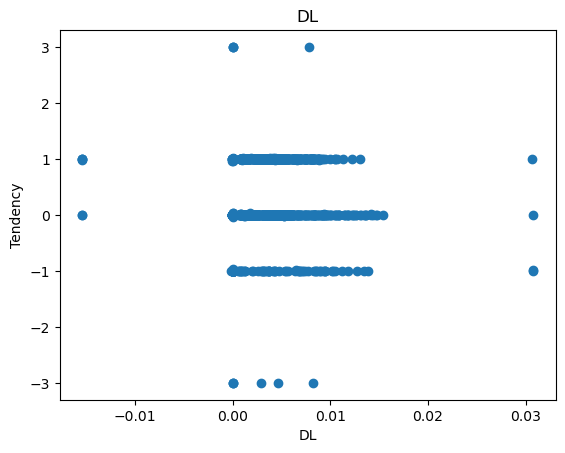

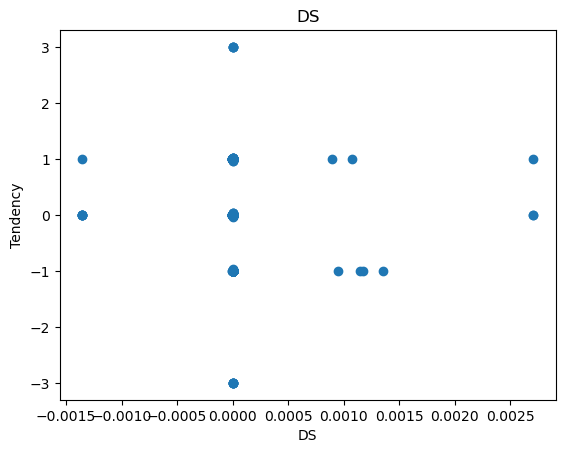

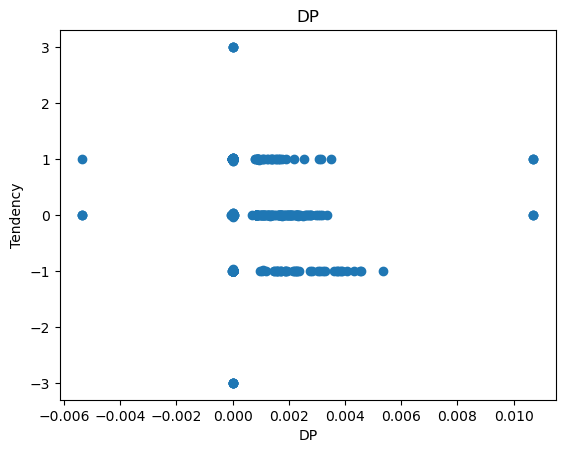

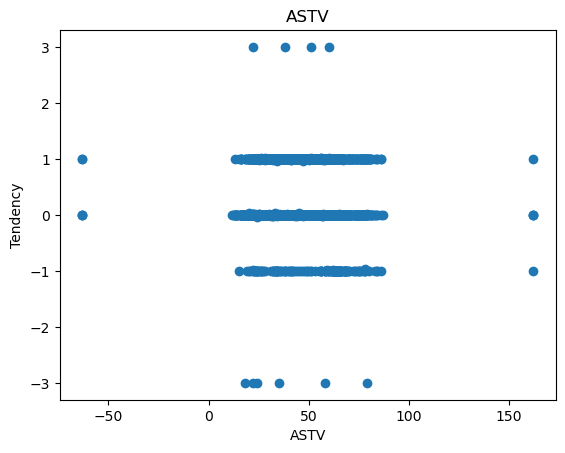

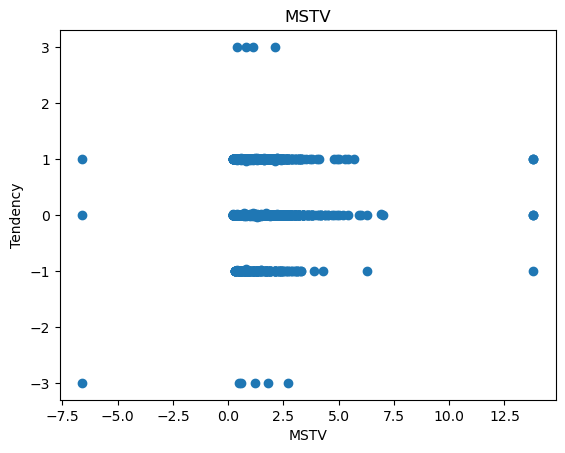

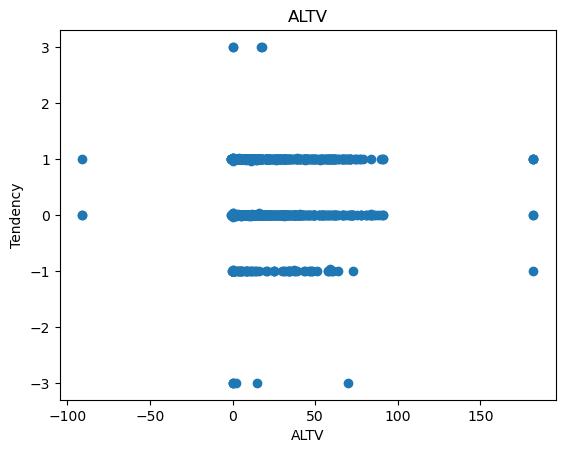

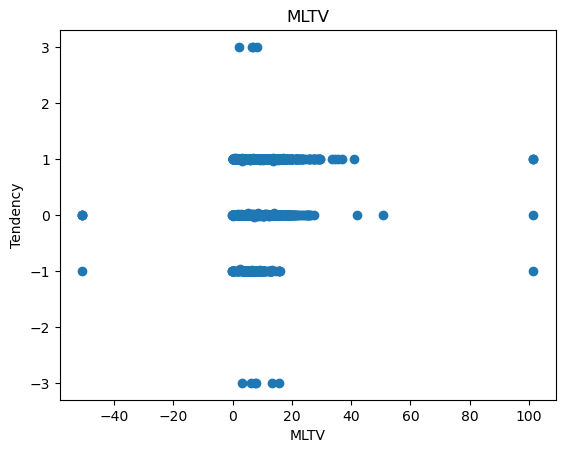

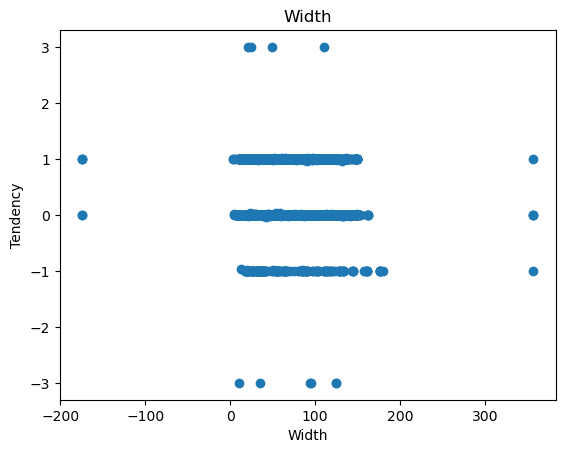

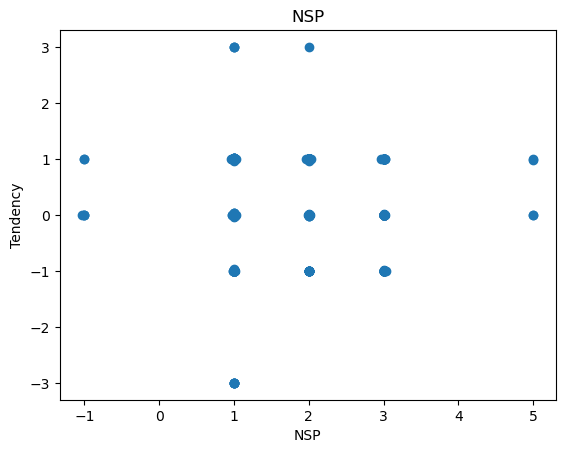

In [51]:
for feature in continuous_feature:
    if feature!="Tendency":
        data=df.copy()         
        plt.scatter(data[feature],data['Tendency'])
        plt.xlabel(feature)
        plt.ylabel('Tendency')
        plt.title(feature)
        plt.show()

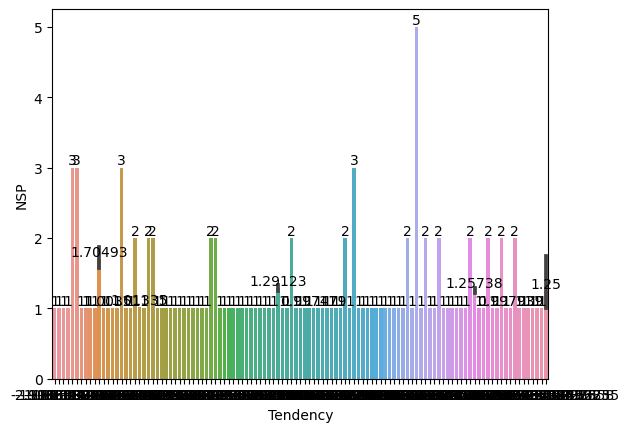

In [53]:
ax = sns.barplot(x = "Tendency", y = 'NSP', data = df)
for i in ax.containers:
    ax.bar_label(i,)